<a href="https://colab.research.google.com/github/isaiasfelipe01/bootcamp_ML-BairesDev/blob/main/Sistema_de_Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
!pip install MTCNN

In [205]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np

In [206]:
detector = MTCNN()

In [207]:
class CARREGAR_FACES:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160, 160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename):
      img = cv.imread(filename)
      img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
      x, y, w, h = self.detector.detect_faces(img)[0]['box']
      x, y = abs(x), abs(y)
      face = img[y:y+h, x:x+w]
      face_arr = cv.resize(face, self.target_size)
      return face_arr

  def load_faces(self, dir):
      FACES = []
      for in_name in os.listdir(dir):
        try:
          path = dir + in_name
          single_face = self.extract_face(path)
          FACES.append(single_face)
        except Exception as e:
          pass
      return FACES

  def load_class(self):
      for sub_dir in os.listdir(self.directory):
        path = self.directory + '/' + sub_dir + '/'
        faces = self.load_faces(path)
        label = [sub_dir for _ in range(len(faces))]
        print('Carregando imagens da classe: ', sub_dir)
        self.X.extend(faces)
        self.Y.extend(label)
      return np.asarray(self.X), np.asarray(self.Y)

  def plot_imagens(self):
    plt.figure(figsize=(18, 16))
    for num, image in enumerate(X):
      ncols = 3
      nrows = len(Y)//ncols + 1
      plt.subplot(nrows, ncols, num+1)
      plt.imshow(image)
      plt.axis('off')


In [208]:
faceload = CARREGAR_FACES("/content/drive/MyDrive/bootcamp_ml/6 - Frameworks de DL/dataset/dataset")
X, Y = faceload.load_class()

Carregando imagens da classe:  robert_downey
Carregando imagens da classe:  jenna_ortega
Carregando imagens da classe:  taylor_swift


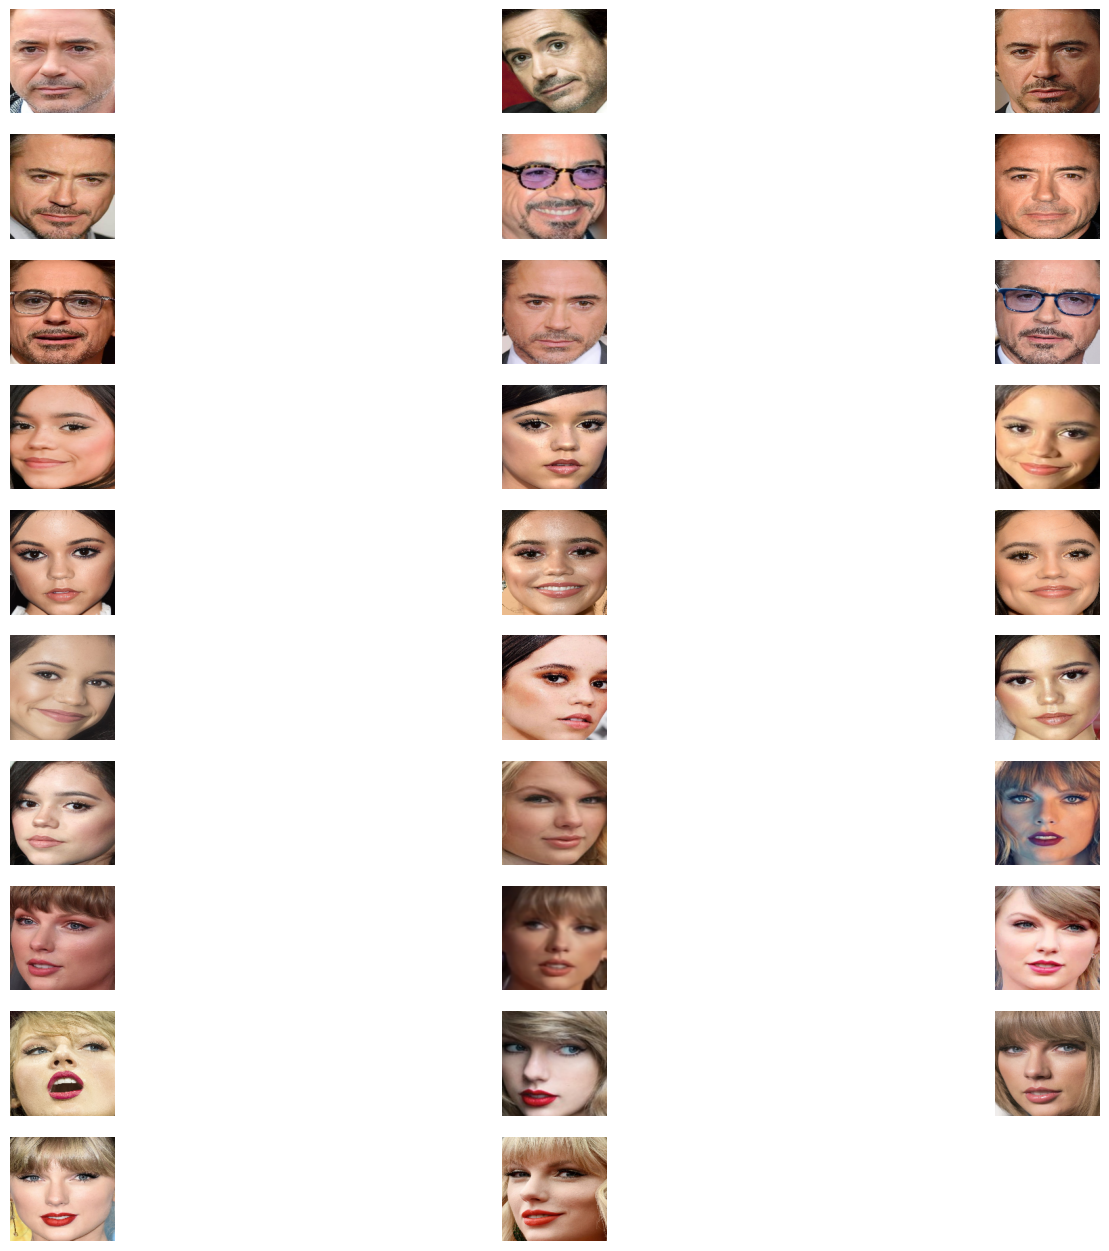

In [209]:
faceload.plot_imagens()

In [210]:
!pip install keras-facenet

In [211]:
from keras_facenet import FaceNet

In [212]:
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    yhat = embedder.embeddings(face_img)
    return yhat[0]

In [213]:
EMBEDDED_X = []
for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [214]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [215]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [216]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [218]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [219]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)


In [220]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, ypreds_train)

1.0

In [221]:
accuracy_score(Y_test, ypreds_test)

1.0

In [222]:
t_im = cv.imread('test2.jpg')
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x, y, w, h = detector.detect_faces(t_im)[0]['box']


In [223]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160, 160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


In [224]:
test_im = [test_im]
ypreds_test = model.predict(test_im)

In [225]:
ypreds_test

array([1])

In [226]:
encoder.inverse_transform(ypreds_test)

array(['robert_downey'], dtype='<U13')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


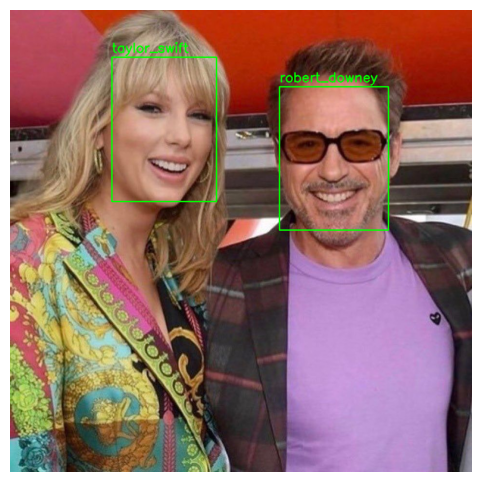

In [227]:
# Carregar a imagem de teste
t_im = cv.imread('test3.jpg')
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)



# Detectar a face na imagem
results = detector.detect_faces(t_im)
for c in range(len(results)):
  x, y, w, h = results[c]['box']
  face = t_im[y:y+h, x:x+w]
  face = cv.resize(face, (160, 160))
  test_embedding = get_embedding(face)
  # Fazer a predição
  ypreds_test = model.predict([test_embedding])
  predicted_class = encoder.inverse_transform(ypreds_test)[0]
  cv.rectangle(t_im, (x, y), (x + w, y + h), (0, 255, 0), 2)
  cv.putText(t_im, predicted_class, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Exibir a imagem com a classe prevista
plt.figure(figsize=(8, 6))
plt.imshow(t_im)
plt.axis('off')
plt.show()
